In [1]:
# Dependencies
import json
import csv
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress
import requests
from api_keys import omdb_api_key
from omdbapi.movie_search import GetMovie


In [2]:
# Create path to obtain movie information from OMDB API
movie = GetMovie(api_key=omdb_api_key)


In [3]:
# Create Movies List that we want to sample for the purpose of performing the analysis:

movie_list = ["The Shawshank Redemption", "The Godfather", 'Pulp Fiction', 'The Dark Knight',"Schindler's List",'Forrest Gump',
              'The Matrix', 'Inception','The Lord of the Rings: The Return of the King','The Silence of the Lambs', 'Goodfellas',
              'Rogue One: A Star Wars Story', 'Reservoir Dogs', 'The Usual Suspects', 'Pig', 'The Grand Budapest Hotel',
              'The Mummy', 'Lightyear', 'Thor: Ragnarok', 'Man of Steel', 'Drive', 'The Crow','Margin Call','Donnie Darko',
              '10 Things I Hate About You','Sicario','Dark Water','A League of Their Own','Antlers','Life',"The Avengers","The Revenant",
              "The Grand Budapest Hotel","Shutter Island","No Country for Old Men","The Prestige","Whiplash","Mad Max: Fury Road",
              "The Social Network","Django Unchained","The Green Mile","Memento","The Intouchables","The Sixth Sense","The Dark Knight Rises",
              "Blade Runner 2049","La La Land","Fight Club","Gladiator","Interstellar","Braveheart","Jurassic Park","The Departed",
              "Inglourious Basterds","Casablanca","The Usual Suspects","The Godfather: Part II","The Good, the Bad and the Ugly",
              "Raiders of the Lost Ark","One Flew Over the Cuckoo's Nest","Star Wars: Episode IV - A New Hope","The Empire Strikes Back",
              "Return of the Jedi","Eternal Sunshine of the Spotless Mind","In Bruges", "I Am Legend", "28 Days Later", "Army of Darkness", 
              "Oppenheimer", "The Lion King", "Joker", "Indiana Jones and the Raiders of the Lost Ark", "Oldboy", "Avengers: Endgame", "Amadeus",
              "The Sea"]

movies_data = []

In [4]:
# Get movie details for all movies using a for loop function:
for movi in movie_list:
    try:
        movinfo = movie.get_movie(title=movi)

        # Fetch required information for the movies:
        movi_title = movinfo["title"]
        rel_year = movinfo["year"]
        movi_genre = movinfo["genre"]
        movi_rating = movinfo["imdbrating"]
        movi_votes = movinfo["imdbvotes"]
        movi_reven = movinfo["boxoffice"]

         # Append the City information into city_data list
        movies_data.append({"Title": movi_title, 
                          "Release Year": rel_year, 
                          "Genre": movi_genre, 
                          "Rating": movi_rating,
                          "Count of Votes": movi_votes,
                          "Box Office Revenue": movi_reven})

     # If an error is experienced, skip the movie

    except:
        print("movie not found")
    pass

In [5]:
# Convert the movies data into a Pandas DataFrame
movies_data_df = pd.DataFrame(movies_data)

# Show Record Count
movies_data_df.count()

Title                 76
Release Year          76
Genre                 76
Rating                76
Count of Votes        76
Box Office Revenue    76
dtype: int64

In [6]:
# Drop NA values and show dataframe
movies_data_df.dropna(inplace=True)

In [7]:
movies_data_df

,Title,Release Year,Genre,Rating,Count of Votes,Box Office Revenue
0,The Shawshank Redemption,1994,Drama,9.3,"2,790,043","$28,767,189"
1,The Godfather,1972,"Crime, Drama",9.2,"1,945,639","$136,381,073"
2,Pulp Fiction,1994,"Crime, Drama",8.9,"2,142,709","$107,928,762"
3,The Dark Knight,2008,"Action, Crime, Drama",9.0,"2,774,186","$534,987,076"
4,Schindler's List,1993,"Biography, Drama, History",9.0,"1,404,593","$96,898,818"
...,...,...,...,...,...,...
71,Indiana Jones and the Raiders of the Lost Ark,1981,"Action, Adventure",8.4,"1,011,175","$248,159,971"
72,Oldboy,2003,"Action, Drama, Mystery",8.4,"608,751","$2,338,699"
73,Avengers: Endgame,2019,"Action, Adventure, Drama",8.4,"1,210,961","$858,373,000"
74,Amadeus,1984,"Biography, Drama, Music",8.4,"414,434","$51,973,029"


In [8]:
# Get datatype of Count of Votes column:
movies_data_df["Count of Votes"].head()

0    2,790,043
1    1,945,639
2    2,142,709
3    2,774,186
4    1,404,593
Name: Count of Votes, dtype: object

In [9]:
# Convert Count of Votes to numeric:
movies_data_df["Count of Votes"]=pd.to_numeric(movies_data_df["Count of Votes"].str.replace(',',''), errors='coerce')
movies_data_df["Count of Votes"].head()

0    2790043
1    1945639
2    2142709
3    2774186
4    1404593
Name: Count of Votes, dtype: int64

In [10]:
# Calculate the average (mean) count of votes:
average_vote_count = round(movies_data_df["Count of Votes"].mean(),0)
print(f"Average count of votes per movie is {average_vote_count}")

Average count of votes per movie is 1049047.0


In [11]:
# Get Box Office Revenue data type:
movies_data_df["Box Office Revenue"] = movies_data_df['Box Office Revenue'].str.replace('$', '').str.replace(',', '').astype(int)
movies_data_df["Box Office Revenue"].head()

0     28767189
1    136381073
2    107928762
3    534987076
4     96898818
Name: Box Office Revenue, dtype: int32

In [12]:
# Calculate the average (mean) revenue:
average_revenue = round(movies_data_df["Box Office Revenue"].mean(),2)
print(f"Average revenue per movie is {average_revenue}")

Average revenue per movie is 158814220.79


In [13]:
# Calculate the average of ratings:
movies_data_df["Rating"]=pd.to_numeric(movies_data_df["Rating"])
average_rating = round(movies_data_df["Rating"].mean(),0)
print(f"Average rating is {average_rating}")

Average rating is 8.0


In [14]:
# Print average revenue analysis based on count of votes and ratings
print(f"From the dataset, we see that a movie with a rating of {average_rating} and {average_vote_count} votes earns a revenue of about ${average_revenue}")

From the dataset, we see that a movie with a rating of 8.0 and 1049047.0 votes earns a revenue of about $158814220.79


In [15]:
# Get average Box Office Revenue by Genre category and identify which genre earns the highest revenue:
avg_rev_gen = movies_data_df.groupby(["Genre"])["Box Office Revenue"].mean()
avg_rev_gen_df = pd.DataFrame(avg_rev_gen)

avg_rev_gen_df.sort_values("Box Office Revenue", ascending=False)

,Box Office Revenue
Genre,
"Action, Drama, Thriller",4.481496e+08
"Animation, Adventure, Drama",4.227838e+08
"Action, Adventure, Drama",4.022859e+08
"Action, Sci-Fi",3.977174e+08
"Action, Adventure, Sci-Fi",3.357276e+08
"Drama, Romance",3.304553e+08
"Action, Adventure, Comedy",3.150583e+08
"Action, Adventure, Fantasy",3.064260e+08
"Drama, Mystery, Thriller",2.935063e+08


In [16]:
# Print Box office revenue analysis per Genre
print(f"From the dataset we observe that Genre 'Action, Drama, Thriller' earns the highest revenue,followed by 'Animation, Adventure, Drama'")
print(f"while genre 'Crime, Thriller' earns the lowest.")

From the dataset we observe that Genre 'Action, Drama, Thriller' earns the highest revenue,followed by 'Animation, Adventure, Drama'
while genre 'Crime, Thriller' earns the lowest.


In [17]:
# Get average Box Office Revenue by Count of Votes category and provide analysis:
avg_rev_vot = movies_data_df.groupby(["Genre"])["Count of Votes"].mean()
avg_rev_vot_df = pd.DataFrame(avg_rev_vot)

avg_rev_vot_df.sort_values("Count of Votes", ascending=False)

,Count of Votes
Genre,
"Drama, Romance",2.174144e+06
Drama,2.018383e+06
"Adventure, Drama, Sci-Fi",1.980713e+06
"Crime, Drama",1.803354e+06
"Action, Drama, Thriller",1.770340e+06
"Action, Sci-Fi",1.707814e+06
"Drama, Western",1.631030e+06
"Adventure, Drama, War",1.520799e+06
"Action, Adventure, Drama",1.381248e+06


In [18]:
# Get average Box Office Revenue by Count of Votes category and provide analysis:
avg_rev_rate = round(movies_data_df.groupby(["Genre"])["Rating"].mean(),0)
avg_rev_rate_df = pd.DataFrame(avg_rev_rate)

avg_rev_rate_df.sort_values("Rating", ascending=False)

,Rating
Genre,
"Adventure, Drama, Sci-Fi",9.0
"Biography, Drama, History",9.0
"Biography, Crime, Drama",9.0
"Drama, Romance",9.0
"Crime, Drama",9.0
"Crime, Drama, Fantasy",9.0
"Adventure, Western",9.0
Drama,9.0
"Action, Adventure",8.0


In [19]:
# Get average Box Office Revenue by Count of Votes category and provide analysis:
avg_movi_rate = movies_data_df.groupby(["Rating"])["Count of Votes"].mean()
avg_movi_rate_df = pd.DataFrame(avg_movi_rate)

avg_movi_rate_df.sort_values("Count of Votes", ascending=False)

,Count of Votes
Rating,
9.3,2.790043e+06
8.9,2.142709e+06
9.2,1.945639e+06
8.8,1.912288e+06
9.0,1.853384e+06
8.7,1.511557e+06
8.5,1.171226e+06
8.6,1.165557e+06
8.3,1.156087e+06


In [20]:
movies_data_df

,Title,Release Year,Genre,Rating,Count of Votes,Box Office Revenue
0,The Shawshank Redemption,1994,Drama,9.3,2790043,28767189
1,The Godfather,1972,"Crime, Drama",9.2,1945639,136381073
2,Pulp Fiction,1994,"Crime, Drama",8.9,2142709,107928762
3,The Dark Knight,2008,"Action, Crime, Drama",9.0,2774186,534987076
4,Schindler's List,1993,"Biography, Drama, History",9.0,1404593,96898818
...,...,...,...,...,...,...
71,Indiana Jones and the Raiders of the Lost Ark,1981,"Action, Adventure",8.4,1011175,248159971
72,Oldboy,2003,"Action, Drama, Mystery",8.4,608751,2338699
73,Avengers: Endgame,2019,"Action, Adventure, Drama",8.4,1210961,858373000
74,Amadeus,1984,"Biography, Drama, Music",8.4,414434,51973029


In [21]:
# Check if movie revenue and rating are correlated:
boxoff_rev = movies_data_df.iloc[:,5]
movie_rating = movies_data_df.iloc[:,3]
correlation = st.pearsonr(boxoff_rev,movie_rating)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.22


The correlation between both factors is 0.22


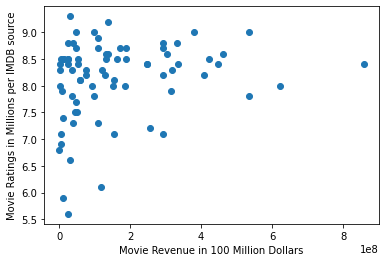

In [22]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(boxoff_rev,movie_rating)
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Movie Ratings in Millions per IMDB source')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [23]:
# Movie Revenue vs Movie Rating Analysis:
print(f"The value of correlation is just around 0.2 which indicates weak correlation between movie's revenue and its ratings.")

The value of correlation is just around 0.2 which indicates weak correlation between movie's revenue and its ratings.


Regression line equation is: y = 0.0 x + 7.98
The r-squared is: 0.21538940663785827
The regression shows a positive correlation.
Movie's revenue has weak correlation to its ratings.


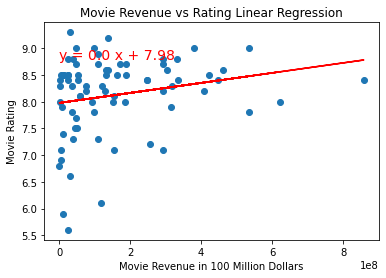

In [24]:
# Linear regression on Movie Revenue vs Count of Votes
(slope, intercept, rvalue, pvalue, stderr) = linregress(boxoff_rev, movie_rating)
regress_values = boxoff_rev * slope + intercept
line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(f"Regression line equation is: {line_eq}")
plt.scatter(boxoff_rev,movie_rating)
plt.plot(boxoff_rev,regress_values,color='red')
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Movie Rating')
plt.annotate(line_eq,(2,8.8),fontsize=14,color='red')
plt.title('Movie Revenue vs Rating Linear Regression')

print(f"The r-squared is: {rvalue}")
print("The regression shows a positive correlation.")
print("Movie's revenue has weak correlation to its ratings.")
plt.show()

In [25]:
# Check if movie revenue and count of votes are correlated:
boxoff_rev = movies_data_df.iloc[:,5]
votes_count = movies_data_df.iloc[:,4]
correlation = st.pearsonr(boxoff_rev, votes_count)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.35


In [26]:
# Movie Revenue vs Count of Votes the movie received analysis:
print(f"The value of pearson correlation is less than 0.5 which indicates weak correlation between movie's revenue and its votes counts.")

The value of pearson correlation is less than 0.5 which indicates weak correlation between movie's revenue and its votes counts.


The correlation between both factors is 0.35


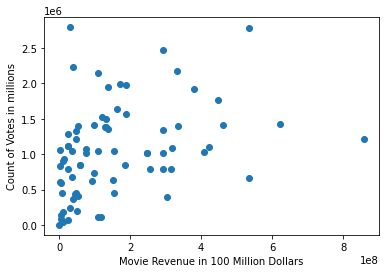

In [27]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(boxoff_rev,votes_count)
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Count of Votes in millions')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

Regression line equation is: y = 0.0 x + 837507.2
The r-squared is: 0.3534131654904985
The regression shows a positive correlation.
Movie's revenue is an indication of higher votes counts it receives.


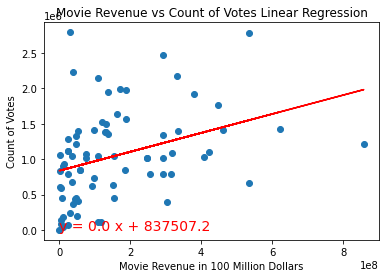

In [28]:
# Linear regression on Movie Revenue vs Count of Votes
(slope, intercept, rvalue, pvalue, stderr) = linregress(boxoff_rev, votes_count)
regress_values = boxoff_rev * slope + intercept
line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(f"Regression line equation is: {line_eq}")
plt.scatter(boxoff_rev,votes_count)
plt.plot(boxoff_rev,regress_values,color='red')
plt.xlabel('Movie Revenue in 100 Million Dollars')
plt.ylabel('Count of Votes')
plt.annotate(line_eq,(2,2.2),fontsize=14,color='red')
plt.title('Movie Revenue vs Count of Votes Linear Regression')

print(f"The r-squared is: {rvalue}")
print("The regression shows a positive correlation.")
print("Movie's revenue is an indication of higher votes counts it receives.")
plt.show()

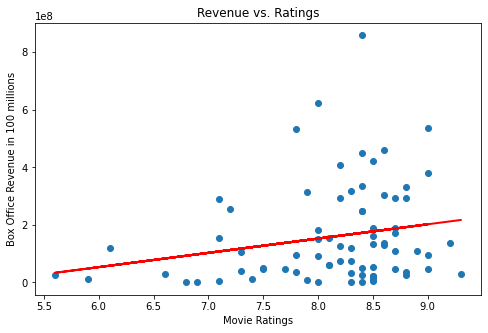

In [29]:
# Plot scatter plot to analyze movie's revenue and the ratings

plt.figure(figsize=(8, 5))
plt.scatter(movies_data_df["Rating"], movies_data_df["Box Office Revenue"])
plt.xlabel("Movie Ratings")
plt.ylabel("Box Office Revenue in 100 millions")
plt.title("Revenue vs. Ratings")

# Create regression line 
slope, intercept, rvalue, pvalue, stderr = linregress(
    movies_data_df["Rating"], movies_data_df["Box Office Revenue"])
regress_values = movies_data_df["Rating"] * slope + intercept
plt.plot(movies_data_df["Rating"], regress_values, color="red", linewidth=2)
plt.show()

Text(0.5, 1.0, 'Count of Votes vs. Movie Ratings')

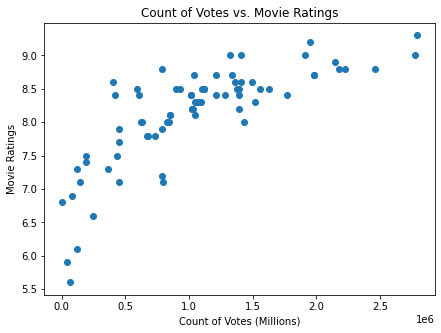

In [30]:
# Create scatter plot to analyze the count of votes and movie ratings
plt.figure(figsize=(7, 5))
plt.scatter(movies_data_df["Count of Votes"], movies_data_df["Rating"])
plt.xlabel("Count of Votes (Millions)")
plt.ylabel("Movie Ratings")
plt.title("Count of Votes vs. Movie Ratings")

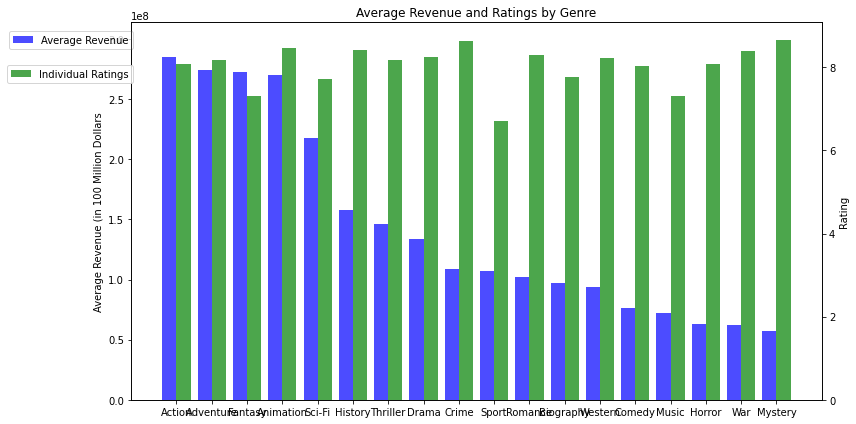

In [31]:
# Split genres and create separate rows for each genre
genre_split = movies_data_df["Genre"].str.split(', ')

# Create a list of dictionaries to store split genre
genre_data = []

for index, row in movies_data_df.iterrows():
    for genre in genre_split[index]:
        genre_data.append({
            "Genre": genre,
            "Box Office Revenue": row["Box Office Revenue"],
            "Rating": row["Rating"]
        })

# Create a new DataFrame with split genre data
split_genre_df = pd.DataFrame(genre_data)
avg_revenue_data = split_genre_df.groupby("Genre")["Box Office Revenue"].mean()
avg_revenue_data = avg_revenue_data.sort_values(ascending=False)

# Create a grouped bar chart for average revenue and ratings by genre
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average revenue
bar_width = 0.4
index = range(len(avg_revenue_data))
revenue_bars = ax1.bar(index, avg_revenue_data, bar_width, label="Average Revenue", alpha=0.7, color='b')

# Add a second y-axis for ratings
ax2 = ax1.twinx()
rating_bars = ax2.bar([i + bar_width for i in index], split_genre_df.groupby("Genre")["Rating"].mean(), bar_width, label="Individual Ratings", alpha=0.7, color='g')

# Set labels & titles
plt.xlabel("Genre")
ax1.set_ylabel("Average Revenue (in 100 Million Dollars")
ax2.set_ylabel("Rating")
plt.title("Average Revenue and Ratings by Genre")

# Set y-axis limits for revenue to accommodate the actual data range
ax1.set_ylim(0, max(avg_revenue_data) * 1.1)

# Set x-axis labels 
plt.xticks([i + bar_width/2 for i in index], avg_revenue_data.index, rotation=90, ha='right')


ax1.legend(loc='best', bbox_to_anchor=(0.01, 0.99))
ax2.legend(loc='best', bbox_to_anchor=(0.01, 0.90))

plt.tight_layout()
plt.show()


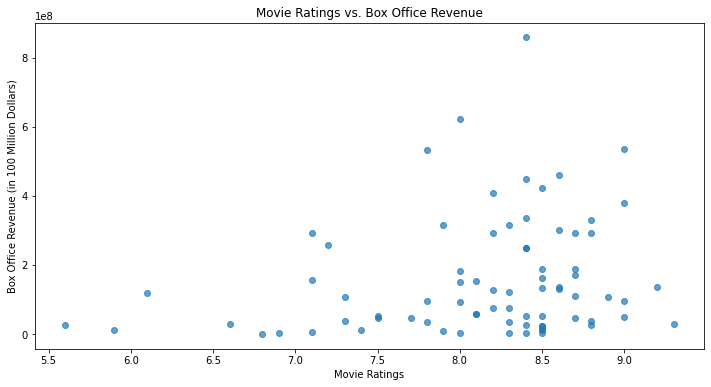

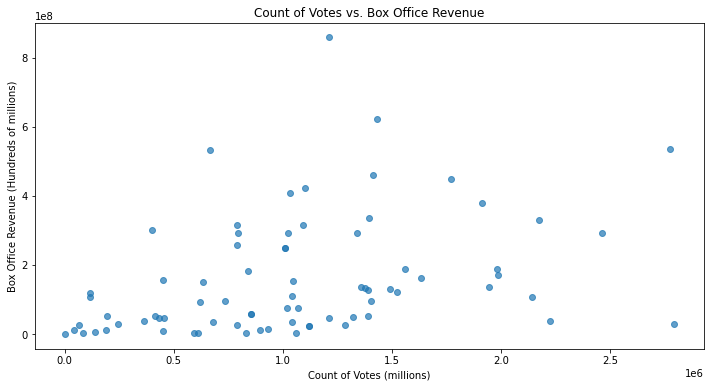

In [32]:
# Scatter plot for movie ratings vs. revenue
plt.figure(figsize=(12, 6))
plt.scatter(movies_data_df["Rating"], movies_data_df["Box Office Revenue"], alpha=0.7)
plt.xlabel("Movie Ratings")
plt.ylabel("Box Office Revenue (in 100 Million Dollars)")
plt.title("Movie Ratings vs. Box Office Revenue")
plt.show()

# Scatter plot for count of votes vs. revenue
plt.figure(figsize=(12, 6))
plt.scatter(movies_data_df["Count of Votes"], movies_data_df["Box Office Revenue"], alpha=0.7)
plt.xlabel("Count of Votes (millions)")
plt.ylabel("Box Office Revenue (Hundreds of millions)")
plt.title("Count of Votes vs. Box Office Revenue")
plt.show()

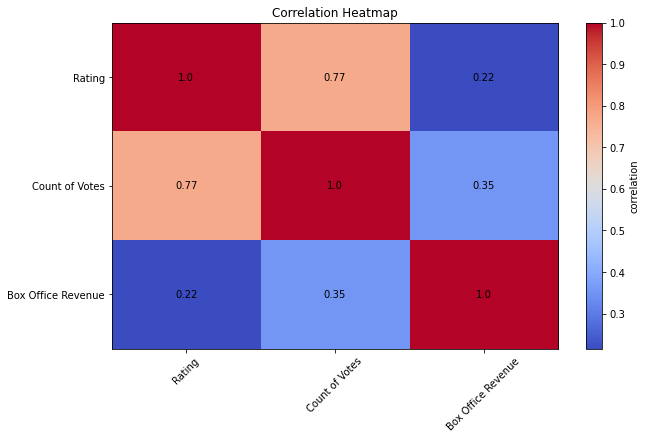

In [34]:
correlation_matrix = movies_data_df[["Rating", "Count of Votes", "Box Office Revenue"]].corr()
plt.figure(figsize=(10,6))
heatmap_rev = plt.imshow(correlation_matrix, cmap="coolwarm", aspect="auto")
plt.colorbar(heatmap_rev, label="correlation")

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                        ha='center', va='center', color='black')
        
plt.title("Correlation Heatmap")
plt.show()

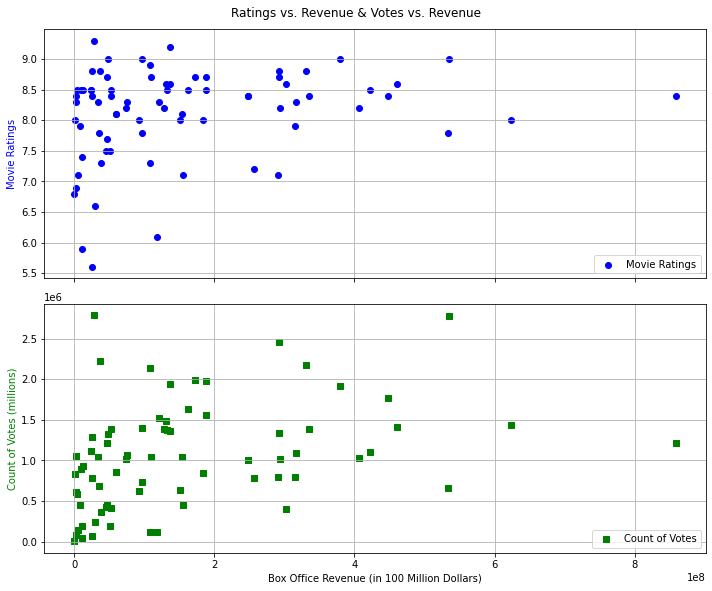

In [36]:
# Data
ratings = movies_data_df["Rating"]
revenue = movies_data_df["Box Office Revenue"]
votes = movies_data_df["Count of Votes"]

# Create separate line charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Line chart for movie ratings vs. revenue
ax1.scatter(revenue, ratings, label="Movie Ratings", color="b", marker="o")
ax1.set_ylabel("Movie Ratings", color="b")
ax1.legend(loc="lower right")
ax1.grid(True)

# Line chart for count of votes vs. revenue
ax2.scatter(revenue, votes, label="Count of Votes", color="g", marker="s")
ax2.set_xlabel("Box Office Revenue (in 100 Million Dollars)")
ax2.set_ylabel("Count of Votes (millions)", color="g")
ax2.legend(loc="lower right")
ax2.grid(True)

# Add a title
plt.suptitle("Ratings vs. Revenue & Votes vs. Revenue", y=1.02)
plt.tight_layout()
plt.show()


In [39]:
# Null Hypothesis: There is no correlation between a movie's revenue and its ratings or count of votes
# Alternate Hypothesis: Count of votes and movie's ratings contribute to movie's revenue and success

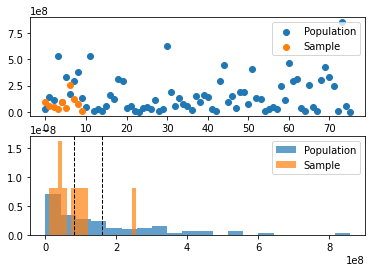

In [37]:
# Perform one t-test:
sample = movies_data_df['Box Office Revenue'].sample(n=10, random_state=42)
population = movies_data_df['Box Office Revenue']

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population)), population, label="Population")
plt.scatter(range(len(sample)), sample, label="Sample")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="Population")
plt.hist(sample, 20, density=True, alpha=0.7, label="Sample")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  


In [38]:
st.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-3.4723648209376736, pvalue=0.007022539912102872)